## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [2]:
df = pd.read_csv('data/banned_book_data_combined_lists.csv')

In [3]:
df.head()

,publication,author,date,year,month,day,reason,state_arc
0,[ARABIC LANGUAGE CHARACTERS].,NaN,2019-12-18 00:00:00,2019.0,12.0,18.0,NaN,fl
1,[ARABIC LANGUAGE CHARACTERS]. TAJWEED QURAN.,NaN,2021-09-09 00:00:00,2021.0,9.0,9.0,NaN,fl
2,[KOREAN LANGUAGE CHARACTERS] HOLY SPIRIT LOVE.,NaN,2021-02-25 00:00:00,2021.0,2.0,25.0,NaN,fl
3,[KOREAN LANGUAGE CHARACTERS].,NaN,2021-02-25 00:00:00,2021.0,2.0,25.0,NaN,fl
4,[KOREAN LANGUAGE CHARACTERS].,NaN,2021-02-25 00:00:00,2021.0,2.0,25.0,NaN,fl


In [4]:
df.columns

Index(['publication', 'author', 'date', 'year', 'month', 'day', 'reason',
       'state_arc'],
      dtype='object')

### About the Columns
- publication - Title of the book
- author - Author
- date - Date the book was banned
- year - Integer year book was banned
- month - Integer month book was banned
- day - Integer day book was banned
- reason - Justification provided by the relevant Department of Corrections for banning the book
- state - State postal code

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48376 entries, 0 to 48375
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   publication  48376 non-null  object 
 1   author       16639 non-null  object 
 2   date         40750 non-null  object 
 3   year         40778 non-null  float64
 4   month        40750 non-null  float64
 5   day          40366 non-null  float64
 6   reason       23350 non-null  object 
 7   state_arc    48376 non-null  object 
dtypes: float64(3), object(5)
memory usage: 3.0+ MB


In [6]:
# many nulls in 'author' & 'reason'

In [7]:
# which states?
df.state_arc.value_counts()

fl    20202
tx     9396
az     4632
va     2553
wi     2281
or     1780
ct     1659
sc     1509
ca     1424
mi      974
nc      600
ia      431
mt      374
nj      232
il      134
ks       99
ri       68
ga       28
Name: state_arc, dtype: int64

## EDA

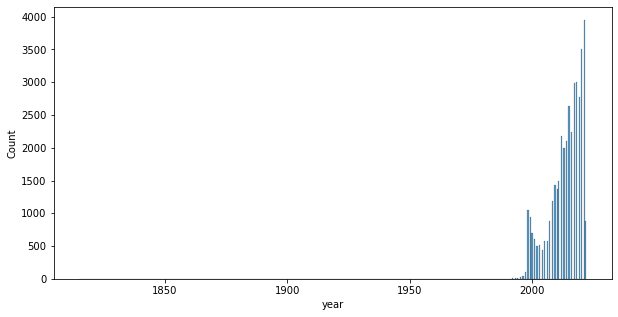

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=df, x='year', ax=ax);

Text(0.5, 1.0, 'Number of Banned Books per State')

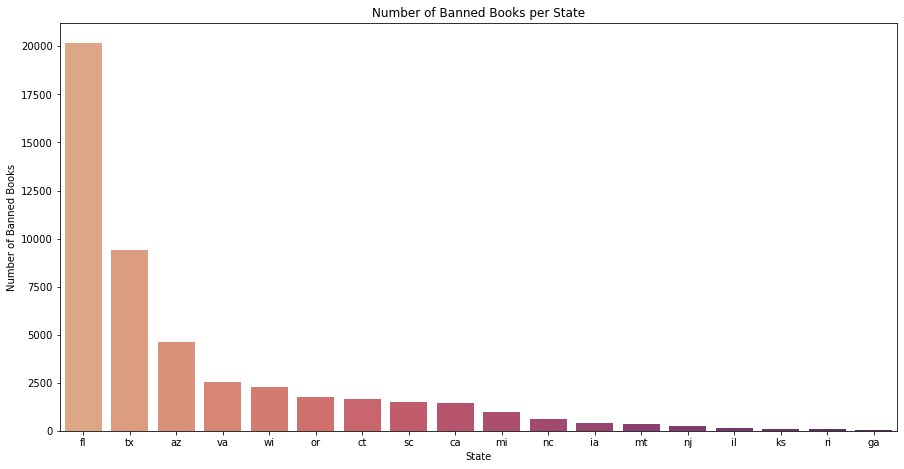

In [31]:
num_books_per_state = pd.DataFrame(df.state_arc.value_counts())

num_books_per_state = num_books_per_state.rename(columns={'state_arc' : 'state_total'})
fig, ax = plt.subplots(figsize=(15,7.5))
sns.barplot(x=num_books_per_state.index, y=num_books_per_state.state_total, palette='flare')
ax.set_ylabel('Number of Banned Books')
ax.set_xlabel('State')
ax.set_title('Number of Banned Books per State')

In [21]:
num_books_per_state.columns

Index(['state_total'], dtype='object')

In [ ]:
num_books_per_state

In [ ]:
df.author.value_counts().head(31)


In [ ]:
# Neil Gaiman's works on the list
df[ df['author'] == 'GAIMAN, NEIL']['publication']

In [ ]:
# Neil Gaiman's works on the list
df[ df['author'] == 'GAIMAN, NEIL'][['publication', 'reason']]

In [ ]:
#Robert Greene's works on the list
df[ df['author'] == 'GREENE, ROBERT']['publication']

In [ ]:
#Robert Greene's works on the list
df[ df['author'] == 'GREENE, ROBERT'][['publication', 'reason']]